In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from uoineuro.utils import (calculate_selection_ratio,
                            plot_difference_distribution,
                            tighten_scatter_plot)
from uoineuro.coupling_utils import check_metrics
%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/coupling')

In [3]:
# consolidate A1 results
a1_results_path = os.path.join(base_path, 'ecog/ecog_coupling.h5')
a1_results = h5py.File(a1_results_path, 'r')
# extract coupling coefficients
a1_lasso_ccs = np.median(a1_results['lasso/coupling_coefs'], axis=0)
a1_uoi_ccs = np.median(a1_results['uoi_lasso_bic/coupling_coefs'], axis=0)

In [4]:
# consolidate V1 results
v1_results_paths = [os.path.join(base_path, 'pvc11/pvc11_monkey1_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey2_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey3_coupling.h5')]
n_v1_fits = len(v1_results_paths)
v1_results = [h5py.File(v1_results_path, 'r')
              for v1_results_path in v1_results_paths]
# extract coupling coefficients
v1_lasso_ccs = [np.median(v1_result['glmnet_poisson/coupling_coefs'], axis=0)
                for v1_result in v1_results]
v1_uoi_ccs = [np.median(v1_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for v1_result in v1_results]

In [5]:
# consolidate M1 results
m1_results_paths = [os.path.join(base_path, 'nhp/nhp_indy_20160407_02_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_01_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_02_coupling.h5')]
n_m1_fits = len(m1_results_paths)
m1_results = [h5py.File(m1_results_path, 'r')
              for m1_results_path in m1_results_paths]
# extract coupling coefficients
m1_lasso_ccs = [np.median(m1_result['glmnet_poisson/coupling_coefs'], axis=0)
                for m1_result in m1_results]
m1_uoi_ccs = [np.median(m1_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for m1_result in m1_results]

In [6]:
colors = ['#4986ae', '#ff800e', '#78b26d']

# Metric Summary

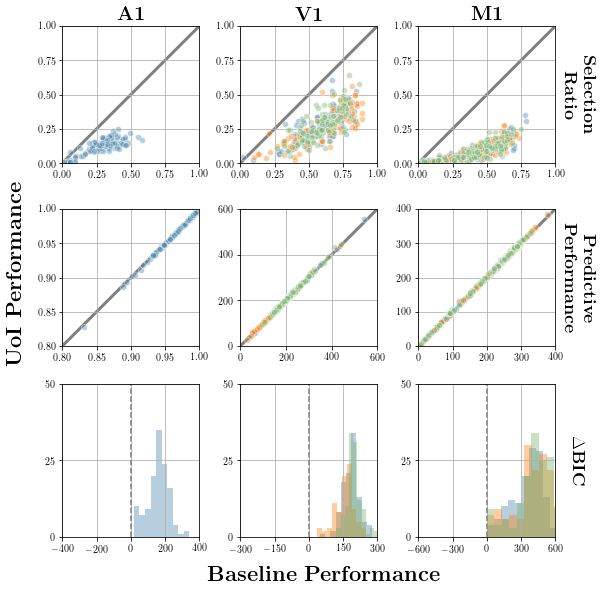

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# selection ratios
axes[0, 0].scatter(
    calculate_selection_ratio(a1_lasso_ccs),
    calculate_selection_ratio(a1_uoi_ccs),
    alpha=0.40,
    color=colors[0],
    edgecolor='w')

[axes[0, 1].scatter(
    calculate_selection_ratio(v1_lasso_ccs[idx]),
    calculate_selection_ratio(v1_uoi_ccs[idx]),
    alpha=0.40,
    color=colors[idx],
    edgecolor='w') for idx in range(n_v1_fits)]

[axes[0, 2].scatter(
    calculate_selection_ratio(m1_lasso_ccs[idx]),
    calculate_selection_ratio(m1_uoi_ccs[idx]),
    alpha=0.40,
    color=colors[idx],
    edgecolor='w') for idx in range(n_m1_fits)]

for ax in axes[0]:
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    
# predictive performances
axes[1, 0].scatter(
    np.median(a1_results['lasso/r2s_test'], axis=0),
    np.median(a1_results['uoi_lasso_bic/r2s_test'], axis=0),
    alpha=0.40,
    color=colors[0],
    edgecolor='w')
axes[1, 0].set_xlim([0.80, 1.])
axes[1, 0].set_xticks([0.8, 0.85, 0.9, 0.95, 1])
axes[1, 0].set_yticks([0.8, 0.85, 0.9, 0.95, 1])

[axes[1, 1].scatter(
    np.median(v1_results[idx]['glmnet_poisson/deviances_test'], axis=0),
    np.median(v1_results[idx]['uoi_poisson_bic/deviances_test'], axis=0),
    alpha=0.40,
    color=colors[idx],
    edgecolor='w') for idx in range(n_v1_fits)]
axes[1, 1].set_xlim([0, 600.])
axes[1, 1].set_xticks([0, 200, 400, 600])
axes[1, 1].set_yticks([0, 200, 400, 600])

[axes[1, 2].scatter(
    np.median(m1_results[idx]['glmnet_poisson/deviances_test'], axis=0),
    np.median(m1_results[idx]['uoi_poisson_bic/deviances_test'], axis=0),
    alpha=0.40,
    color=colors[idx],
    edgecolor='w') for idx in range(n_m1_fits)]
axes[1, 2].set_xlim([0, 400.])
axes[1, 2].set_xticks([0, 100, 200, 300, 400])
axes[1, 2].set_yticks([0, 100, 200, 300, 400])

for ax in axes[:2].ravel():
    ax.set_ylim(ax.get_xlim())
    ax.plot(ax.get_xlim(), ax.get_xlim(),
            color='gray', 
            linewidth=3,
            zorder=-1)
    ax.set_aspect('equal')
    ax.grid('on')
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)
    
# model parsimony
plot_difference_distribution(a1_results['lasso'],
                             [a1_results['uoi_lasso_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[2, 0]]])),
                             color=colors[0],
                             alpha=0.4)

[plot_difference_distribution(v1_results[idx]['glmnet_poisson'],
                             [v1_results[idx]['uoi_poisson_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[2, 1]]])),
                             color=colors[idx],
                             alpha=0.4) for idx in range(n_v1_fits)]

[plot_difference_distribution(m1_results[idx]['glmnet_poisson'],
                             [m1_results[idx]['uoi_poisson_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[2, 2]]])),
                             color=colors[idx],
                             alpha=0.4) for idx in range(n_m1_fits)]

axes[2, 0].set_xlim([-400, 400])
axes[2, 0].set_xticks([-400, -200, 0, 200, 400])
axes[2, 1].set_xlim([-300, 300])
axes[2, 1].set_xticks([-300, -150, 0, 150, 300])
axes[2, 2].set_xlim([-600, 600])
axes[2, 2].set_xticks([-600, -300, 0, 300, 600])

for ax in axes[2]:
    ax.axvline(0, linestyle='--', color='gray')
    ax.set_ylim([0, 50])
    ax.set_yticks([0, 25, 50])
    ax.grid('on')
    ax.tick_params(labelsize=10)

# labels
axes[0, 0].set_title(r'\textbf{A1}', fontsize=20)
axes[0, 1].set_title(r'\textbf{V1}', fontsize=20)
axes[0, 2].set_title(r'\textbf{M1}', fontsize=20)

# metric labels
axes[0, -1].set_ylabel(
    r'\textbf{Selection}' '\n' r'\textbf{Ratio}',
    fontsize=18,
    labelpad=40,
    rotation=270)
axes[1, -1].set_ylabel(
    r'\textbf{Predictive}' '\n' r'\textbf{Performance}',
    fontsize=18,
    labelpad=40,
    rotation=270)
axes[2, -1].set_ylabel(
    r'$\Delta$\textbf{BIC}',
    fontsize=18,
    labelpad=30,
    rotation=270)
axes[0, -1].yaxis.set_label_position('right')
axes[1, -1].yaxis.set_label_position('right')
axes[2, -1].yaxis.set_label_position('right')

fig_invert = fig.transFigure.inverted()
middle_x, _ = fig_invert.transform(axes[-1, 1].transAxes.transform([0.5, 0.]))
_, middle_y = fig_invert.transform(axes[1, 1].transAxes.transform([0., 0.5]))
fig.text(
    x=middle_x, y=-0.02,
    s=r'\textbf{Baseline Performance}',
    fontsize=22,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=-0.02, y=middle_y,
    s=r'\textbf{UoI Performance}',
    fontsize=22,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

plt.tight_layout()
plt.savefig('coupling_metric_summary.pdf', bbox_inches='tight')

# Distribution of Coefficients

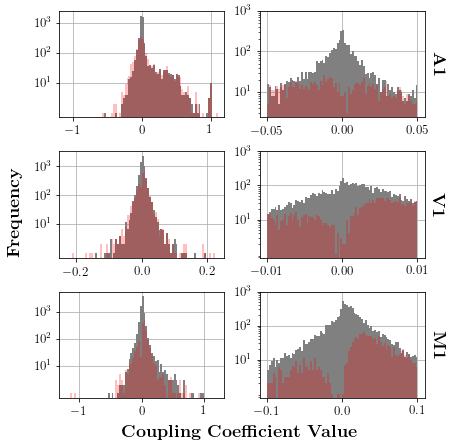

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(6, 6))

a1_lasso_nz_ccs = a1_lasso_ccs.ravel()
a1_lasso_nz_ccs = a1_lasso_nz_ccs[a1_lasso_nz_ccs != 0]
a1_uoi_nz_ccs = a1_uoi_ccs.ravel()
a1_uoi_nz_ccs = a1_uoi_nz_ccs[a1_uoi_nz_ccs != 0]

# auditory cortex
bins_a1 = np.linspace(-1.1, 1.1, 81)
axes[0, 0].hist(a1_lasso_nz_ccs,
             color='gray',
             bins=bins_a1)
axes[0, 0].hist(a1_uoi_nz_ccs,
             color='red',
             bins=bins_a1,
             alpha=0.25)
axes[0, 0].set_yscale('log', nonposy='clip')
axes[0, 0].set_xlim([-1.2, 1.2])

bins_a1 = np.linspace(-0.05, 0.05, 81)
axes[0, 1].hist(a1_lasso_nz_ccs,
             color='gray',
             bins=bins_a1)
axes[0, 1].hist(a1_uoi_nz_ccs,
             color='red',
             bins=bins_a1,
             alpha=0.25)
axes[0, 1].set_yscale('log', nonposy='clip')

# visual cortex
v1_lasso_nz_ccs = v1_lasso_ccs[0].ravel()
v1_lasso_nz_ccs = v1_lasso_nz_ccs[v1_lasso_nz_ccs != 0]
v1_uoi_nz_ccs = v1_uoi_ccs[0].ravel()
v1_uoi_nz_ccs = v1_uoi_nz_ccs[v1_uoi_nz_ccs != 0]

bins_v1 = np.linspace(-0.23, 0.23, 81)
axes[1, 0].hist(v1_lasso_nz_ccs,
             color='gray',
             bins=bins_v1)
axes[1, 0].hist(v1_uoi_nz_ccs,
             color='red',
             bins=bins_v1,
             alpha=0.25)
axes[1, 0].set_yscale('log', nonposy='clip')

bins_v1 = np.linspace(-0.01, 0.01, 81)
axes[1, 1].hist(v1_lasso_nz_ccs,
             color='gray',
             bins=bins_v1)
axes[1, 1].hist(v1_uoi_nz_ccs,
             color='red',
             bins=bins_v1,
             alpha=0.25)
axes[1, 1].set_yscale('log', nonposy='clip')

# motor cortex
m1_lasso_nz_ccs = m1_lasso_ccs[0].ravel()
m1_lasso_nz_ccs = m1_lasso_nz_ccs[m1_lasso_nz_ccs != 0]
m1_uoi_nz_ccs = m1_uoi_ccs[0].ravel()
m1_uoi_nz_ccs = m1_uoi_nz_ccs[m1_uoi_nz_ccs != 0]

bins_m1 = np.linspace(-1.2, 1.2, 81)
axes[2, 0].hist(m1_lasso_nz_ccs,
             color='gray',
             bins=bins_m1)
axes[2, 0].hist(m1_uoi_nz_ccs,
             color='red',
             bins=bins_m1,
             alpha=0.25)
axes[2, 0].set_yscale('log', nonposy='clip')

bins_m1 = np.linspace(-0.1, 0.1, 81)
axes[2, 1].hist(m1_lasso_nz_ccs,
             color='gray',
             bins=bins_m1)
axes[2, 1].hist(m1_uoi_nz_ccs,
             color='red',
             bins=bins_m1,
             alpha=0.25)
axes[2, 1].set_yscale('log', nonposy='clip')

for ax in axes.ravel():
    ax.set_yticks([10, 100, 1000])
    ax.tick_params(labelsize=13)
    ax.grid('on')
    ax.yaxis.set_label_position('right')

# metric labels
axes[0, 1].set_ylabel(
    r'\textbf{A1}',
    fontsize=18,
    labelpad=20,
    rotation=270)
axes[1, 1].set_ylabel(
    r'\textbf{V1}',
    fontsize=18,
    labelpad=20,
    rotation=270)
axes[2, 1].set_ylabel(
    r'\textbf{M1}',
    fontsize=18,
    labelpad=20,
    rotation=270)

for ax in axes.ravel():
    ax.set_axisbelow(True)

fig.text(
    x=-0.02, y=0.5,
    s=r'\textbf{Frequency}',
    fontsize=18,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=0.5, y=-0.01,
    s=r'\textbf{Coupling Coefficient Value}',
    fontsize=18,
    horizontalalignment='center',
    verticalalignment='center')

plt.tight_layout()
plt.savefig('coupling_coef_histogram.pdf', bbox_inches='tight')

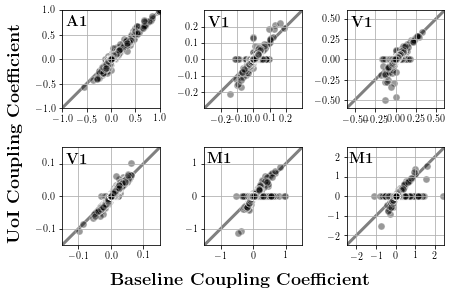

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(6, 4))
ax_list = axes.ravel()

lasso_coefs = [a1_lasso_ccs.ravel()] + \
              [v1_lasso_ccs[idx].ravel() for idx in range(n_v1_fits)] + \
              [m1_lasso_ccs[idx].ravel() for idx in range(n_m1_fits)]
uoi_coefs =   [a1_uoi_ccs.ravel()] + \
              [v1_uoi_ccs[idx].ravel() for idx in range(n_v1_fits)] + \
              [m1_uoi_ccs[idx].ravel() for idx in range(n_m1_fits)]

for idx, ax in enumerate(ax_list):
    ax.scatter(
        lasso_coefs[idx], uoi_coefs[idx],
        color='k',
        edgecolor='w',
        s=50,
        alpha=0.40)
    ax.grid('on')
    ax.tick_params(labelsize=10)
    
tighten_scatter_plot(axes[0, 0], [-1., 1.])
tighten_scatter_plot(axes[0, 1], [-0.3, 0.3])
tighten_scatter_plot(axes[0, 2], [-0.60, 0.60])
tighten_scatter_plot(axes[1, 0], [-0.15, 0.15])
tighten_scatter_plot(axes[1, 1], [-1.5, 1.5])
tighten_scatter_plot(axes[1, 2], [-2.5, 2.5])

axes[0, 0].set_xticks([-1, -0.5, 0, 0.5, 1.])
axes[0, 0].set_yticks(axes[0, 0].get_xticks())
axes[0, 1].set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
axes[0, 1].set_yticks(axes[0, 1].get_xticks())
axes[0, 2].set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
axes[0, 2].set_yticks(axes[0, 2].get_xticks())
axes[1, 0].set_xticks([-0.1, 0, 0.1])
axes[1, 0].set_yticks(axes[1, 0].get_xticks())
axes[1, 1].set_xticks([-1,  0, 1.])
axes[1, 1].set_yticks(axes[1, 1].get_xticks())
axes[1, 2].set_xticks([-2, -1, 0, 1, 2.])
axes[1, 2].set_yticks(axes[1, 2].get_xticks())

labels = [r'\textbf{A1}', r'\textbf{V1}', r'\textbf{V1}',
          r'\textbf{V1}', r'\textbf{M1}', r'\textbf{M1}']

for idx, label in enumerate(labels):
    ax_list[idx].text(
        x=0.15, y=0.87,
        s=label,
        fontsize=15,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax_list[idx].transAxes)   

fig.text(
    x=-0.02, y=0.5,
    s=r'\textbf{UoI Coupling Coefficient}',
    fontsize=18,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=0.5, y=-0.01,
    s=r'\textbf{Baseline Coupling Coefficient}',
    fontsize=18,
    horizontalalignment='center',
    verticalalignment='center')

plt.tight_layout()
plt.savefig('coupling_coefficient_scatter_plots.pdf', bbox_inches='tight')

# Hexbin and Histograms

In [7]:
alt_grey = np.ones((256, 4))
fillin = np.linspace(0.90, 0., 255)
alt_grey[1:, 0] = fillin
alt_grey[1:, 1] = fillin
alt_grey[1:, 2] = fillin
alt_cmap = matplotlib.colors.ListedColormap(colors=alt_grey)

In [11]:
a1_baseline_ccs_all = a1_lasso_ccs.ravel()
a1_uoi_ccs_all = a1_uoi_ccs.ravel()

v1_baseline_ccs_all = np.concatenate(
    [v1_lasso_ccs[idx].ravel()
     for idx in range(n_v1_fits)])
v1_uoi_ccs_all = np.concatenate(
    [v1_uoi_ccs[idx].ravel()
     for idx in range(n_v1_fits)])

m1_baseline_ccs_all = np.concatenate(
    [m1_lasso_ccs[idx].ravel()
     for idx in range(n_v1_fits)])
m1_uoi_ccs_all = np.concatenate(
    [m1_uoi_ccs[idx].ravel()
     for idx in range(n_v1_fits)])

In [24]:
a1_baseline_nz_ccs = a1_baseline_ccs_all[a1_baseline_ccs_all != 0]
a1_uoi_nz_ccs = a1_uoi_ccs_all[a1_uoi_ccs_all != 0]
bins_a1 = np.linspace(-0.05, 0.05, 81)

v1_baseline_nz_ccs = v1_baseline_ccs_all[v1_baseline_ccs_all != 0]
v1_uoi_nz_ccs = v1_uoi_ccs_all[v1_uoi_ccs_all != 0]
bins_v1 = np.linspace(-0.01, 0.01, 81)

m1_baseline_nz_ccs = m1_baseline_ccs_all[m1_baseline_ccs_all != 0]
m1_uoi_nz_ccs = m1_uoi_ccs_all[m1_uoi_ccs_all != 0]
bins_m1 = np.linspace(-0.1, 0.1, 81)

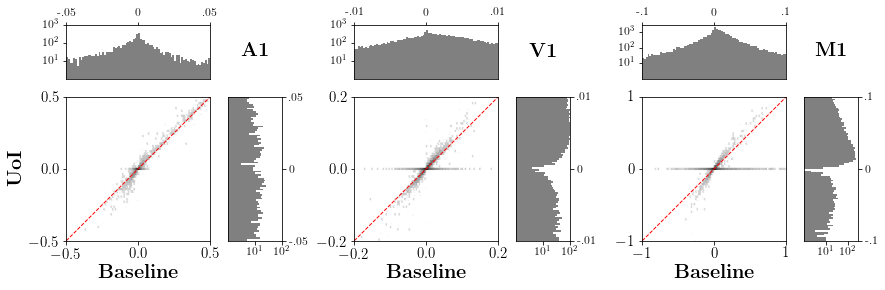

In [45]:
f_height = 3
f_width = 12
fig = plt.figure(figsize=(f_width, f_height))

hex_dim = 2.
hex_spacing = 2.
top_spacing = 0.25
side_spacing = 0.25
hist_height = 0.75

a1_x = 0.
a1_y = 0.
a1_w = hex_dim / f_width
a1_h = hex_dim / f_height
a1_2d = fig.add_axes([a1_x, a1_y, a1_w, a1_h])
a1_2d.hexbin(
    a1_baseline_ccs_all,
    a1_uoi_ccs_all,
    bins='log',
    extent=[-0.5, 0.5, -0.5, 0.5],
    cmap=alt_cmap)
tighten_scatter_plot(a1_2d, bounds=[-0.5, 0.5],
                     line_kwargs={'color': 'red',
                                  'linestyle': '--',
                                  'zorder': 2,
                                  'linewidth': 1})

a1_top_x = a1_x
a1_top_y = a1_y + a1_h + (top_spacing / f_height)
a1_top_w = a1_w
a1_top_h = hist_height / f_height
a1_top = fig.add_axes([a1_top_x, a1_top_y, a1_top_w, a1_top_h])
a1_top.hist(a1_baseline_nz_ccs,
            color='gray',
            bins=bins_a1)
a1_top.set_yscale('log', nonposy='clip')

a1_side_x = a1_x + a1_w + (side_spacing / f_width)
a1_side_y = a1_y
a1_side_w = hist_height / f_width
a1_side_h = a1_h
a1_side = fig.add_axes([a1_side_x, a1_side_y, a1_side_w, a1_side_h])
a1_side.hist(a1_uoi_nz_ccs,
             color='gray',
             bins=bins_a1,
             orientation='horizontal')
a1_side.set_xscale('log', nonposx='clip')

v1_x = a1_x + a1_w + (hex_spacing / f_width)
v1_y = a1_y
v1_w = hex_dim / f_width
v1_h = hex_dim / f_height
v1_2d = fig.add_axes([v1_x, v1_y, v1_w, v1_h])
v1_2d.hexbin(
    v1_baseline_ccs_all,
    v1_uoi_ccs_all,
    bins='log',
    cmap=alt_cmap,
    extent=[-0.20, 0.20, -0.20, 0.20])
tighten_scatter_plot(v1_2d, bounds=[-0.20, 0.20],
                     line_kwargs={'color': 'red',
                                  'linestyle': '--',
                                  'zorder': 2,
                                  'linewidth': 1})

v1_top_x = v1_x
v1_top_y = v1_y + v1_h + (top_spacing / f_height)
v1_top_w = v1_w
v1_top_h = hist_height / f_height
v1_top = fig.add_axes([v1_top_x, v1_top_y, v1_top_w, v1_top_h])
v1_top.hist(v1_baseline_nz_ccs,
            color='gray',
            bins=bins_v1)
v1_top.set_yscale('log', nonposy='clip')

v1_side_x = v1_x + v1_w + (side_spacing / f_width)
v1_side_y = v1_y
v1_side_w = hist_height / f_width
v1_side_h = v1_h
v1_side = fig.add_axes([v1_side_x, v1_side_y, v1_side_w, v1_side_h])
v1_side.hist(v1_uoi_nz_ccs,
             color='gray',
             bins=bins_v1,
             orientation='horizontal')
v1_side.set_xscale('log', nonposx='clip')

m1_x = v1_x + v1_w + (hex_spacing / f_width)
m1_y = a1_y
m1_w = hex_dim / f_width
m1_h = hex_dim / f_height
m1_2d = fig.add_axes([m1_x, m1_y, m1_w, m1_h])
m1_2d.hexbin(
    m1_baseline_ccs_all,
    m1_uoi_ccs_all,
    bins='log',
    extent=[-1, 1, -1, 1],
    cmap=alt_cmap,)
tighten_scatter_plot(m1_2d, bounds=[-1, 1],
                     line_kwargs={'color': 'red',
                                  'linestyle': '--',
                                  'zorder': 2,
                                  'linewidth': 1})

m1_top_x = m1_x
m1_top_y = m1_y + m1_h + (top_spacing / f_height)
m1_top_w = m1_w
m1_top_h = hist_height / f_height
m1_top = fig.add_axes([m1_top_x, m1_top_y, m1_top_w, m1_top_h])
m1_top.hist(m1_baseline_nz_ccs,
            color='gray',
            bins=bins_m1)
m1_top.set_yscale('log', nonposy='clip')

m1_side_x = m1_x + m1_w + (side_spacing / f_width)
m1_side_y = m1_y
m1_side_w = hist_height / f_width
m1_side_h = m1_h
m1_side = fig.add_axes([m1_side_x, m1_side_y, m1_side_w, m1_side_h])
m1_side.hist(m1_uoi_nz_ccs,
             color='gray',
             bins=bins_m1,
             orientation='horizontal')
m1_side.set_xscale('log', nonposx='clip')


# handle all labels
a1_2d.set_xticks([-0.5, 0., 0.5])
a1_2d.set_yticks([-0.5, 0., 0.5])
a1_2d.tick_params(labelsize=15)
a1_top.set_xlim([-0.05, 0.05])
a1_top.set_ylim([1, 1e3])
a1_top.set_xticks([-0.05, 0, 0.05])
a1_top.set_xticklabels(['-.05', '0', '.05'])
a1_top.set_yticks([10, 100, 1000])
a1_top.tick_params(labelsize=12)
a1_top.xaxis.tick_top()
a1_side.set_xlim([1, 1e2])
a1_side.set_xticks([10, 100])
a1_side.set_ylim([-0.05, 0.05])
a1_side.set_yticks([-0.05, 0., 0.05])
a1_side.set_yticklabels(['-.05', '0', '.05'])
a1_side.tick_params(labelsize=12)
a1_side.yaxis.tick_right()

v1_2d.set_xticks([-0.2, 0., 0.2])
v1_2d.set_yticks([-0.2, 0., 0.2])
v1_2d.tick_params(labelsize=15)
v1_top.set_xlim([-0.01, 0.01])
v1_top.set_ylim([1, 1e3])
v1_top.set_xticks([-0.01, 0, 0.01])
v1_top.set_xticklabels(['-.01', '0', '.01'])
v1_top.set_yticks([10, 100, 1000])
v1_top.tick_params(labelsize=12)
v1_top.xaxis.tick_top()
v1_side.set_xlim([1, 1e2])
v1_side.set_xticks([10, 100])
v1_side.set_ylim([-0.01, 0.01])
v1_side.set_yticks([-0.01, 0., 0.01])
v1_side.set_yticklabels(['-.01', '0', '.01'])
v1_side.tick_params(labelsize=12)
v1_side.yaxis.tick_right()

m1_2d.set_xticks([-1, 0., 1])
m1_2d.set_yticks([-1, 0., 1])
m1_2d.tick_params(labelsize=15)
m1_top.set_xlim([-0.1, 0.1])
m1_top.set_ylim([1, 3000])
m1_top.set_xticks([-0.1, 0, 0.1])
m1_top.set_xticklabels(['-.1', '0', '.1'])
m1_top.set_yticks([10, 100, 1000])
m1_top.tick_params(labelsize=12)
m1_top.xaxis.tick_top()
m1_side.set_xlim([1, 300])
m1_side.set_xticks([10, 100])
m1_side.set_ylim([-0.1, 0.1])
m1_side.set_yticks([-0.1, 0., 0.1])
m1_side.set_yticklabels(['-.1', '0', '.1'])
m1_side.tick_params(labelsize=12)
m1_side.yaxis.tick_right()

fig.text(
    x=a1_side_x + (hist_height / f_width) / 2,
    y=a1_top_y + (hist_height / f_height) / 2,
    s=r'\textbf{A1}',
    transform=fig.transFigure,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=20)

fig.text(
    x=v1_side_x + (hist_height / f_width) / 2,
    y=v1_top_y + (hist_height / f_height) / 2,
    s=r'\textbf{V1}',
    transform=fig.transFigure,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=20)

fig.text(
    x=m1_side_x + (hist_height / f_width) / 2,
    y=m1_top_y + (hist_height / f_height) / 2,
    s=r'\textbf{M1}',
    transform=fig.transFigure,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=20)

a1_2d.set_ylabel(r'\textbf{UoI}', fontsize=20)
a1_2d.set_xlabel(r'\textbf{Baseline}', fontsize=20)
v1_2d.set_xlabel(r'\textbf{Baseline}', fontsize=20)
m1_2d.set_xlabel(r'\textbf{Baseline}', fontsize=20)
plt.savefig('hexbin.pdf', bbox_inches='tight')